In [4]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import squarify # tree map plotting

# Natural Language Processing (NLP)
import re
import nltk
import nltk.corpus
from nltk.corpus import wordnet

In [6]:
# Install squarify package.
# import sys
# !{sys.executable} -m pip install squarify

### Read the Data

In [3]:
df = pd.read_csv('../../datasets/lending_club_loans/loan.csv', low_memory = False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.shape

(887379, 74)

In [6]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [30]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [12]:
desc = pd.read_excel('../../datasets/lending_club_loans/LCDataDictionary.xlsx', sheet_name = 1)
desc.head()

,BrowseNotesFile,Description
0,acceptD,The date which the borrower accepted the offer
1,accNowDelinq,The number of accounts on which the borrower i...
2,accOpenPast24Mths,Number of trades opened in past 24 months.
3,addrState,The state provided by the borrower in the loan...
4,annual_inc_joint,The combined self-reported annual income provi...


In [32]:
df.groupby(['term']).mean()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
term,,,,,,,,,,,,,,,,,,,,,
36 months,3.144078e+07,3.391458e+07,12481.396458,12474.785993,12428.552978,12.018678,413.537785,72555.461409,17.582158,0.314726,...,33878.212841,71.172466,1.413498,2.981052,5492.775978,59.715747,30459.002492,0.902049,1.424746,1.919456
60 months,3.485478e+07,3.753817e+07,20059.809712,20030.614282,20007.110404,16.111596,490.790566,80794.598179,19.498138,0.313779,...,42759.741765,72.346671,1.332349,2.962554,6805.127564,63.422281,35718.591441,1.041175,1.797700,2.111560


### Exploratory Data Analysis

#### Distribution of Loan Amount

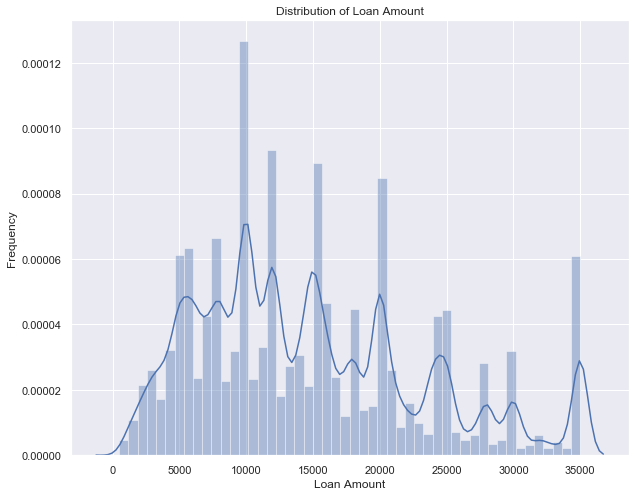

In [4]:
plt.figure(figsize=(10,8))
ax = sns.distplot(df['loan_amnt'])
ax.set_title('Distribution of Loan Amount')
ax.set(xlabel='Loan Amount', ylabel='Frequency')
plt.show()

#### Sum of Loans by Purpose

In [15]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Sum loan_amnt by loan purpose.
portfolio = df.groupby(['purpose']).sum()

# Sort dataframe by summed loan_amnt.
portfolio = portfolio.sort_values(by = "loan_amnt", ascending = False)
portfolio = portfolio.reset_index(drop = False)[['purpose', 'loan_amnt']]

# Calculate percentage.
portfolio['percent'] = round(100 * portfolio['loan_amnt'] / sum(portfolio['loan_amnt']), 2)

# Add tree map labels.
portfolio['label'] = [portfolio['purpose'][i].replace('_', ' ') for i in range(len(portfolio['purpose']))]
portfolio['label'] = [portfolio['label'][i].capitalize() for i in range(len(portfolio['purpose']))]
portfolio['label'] = portfolio['label'] + " (" + portfolio["percent"].astype("str") + "%)"

portfolio.head()

,purpose,loan_amnt,percent,label
0,debt_consolidation,8.087850e+09,61.77,Debt consolidation (61.77%)
1,credit_card,3.162591e+09,24.15,Credit card (24.15%)
2,home_improvement,7.422397e+08,5.67,Home improvement (5.67%)
3,other,4.241941e+08,3.24,Other (3.24%)
4,major_purchase,2.004133e+08,1.53,Major purchase (1.53%)


### Loan grade

In [ ]:
df['grade'].value_counts()

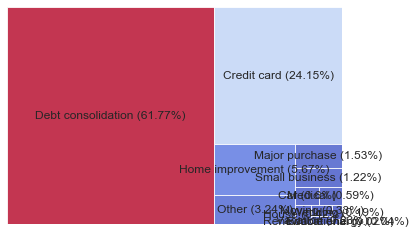

In [18]:
# Get Axis and Figure
fig, ax = plt.subplots()

# Our Colormap
cmap = matplotlib.cm.coolwarm

# Min and Max Values
mini = min(portfolio["loan_amnt"])
maxi = max(portfolio["loan_amnt"])

# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in portfolio["loan_amnt"]]

# Plotting
squarify.plot(sizes=portfolio["loan_amnt"], label=portfolio["label"], alpha=0.8, color=colors)

# Removing Axis
plt.axis('off')
# Invert Y-Axis
plt.gca().invert_yaxis()
# Title
#plt.title("Revenue from Star Wars Franchise Movies", fontsize=32)
# Title Positioning
ttl = ax.title
ttl.set_position([.5, 1.05])
# # BG Color
# fig.set_facecolor('#eeffee')

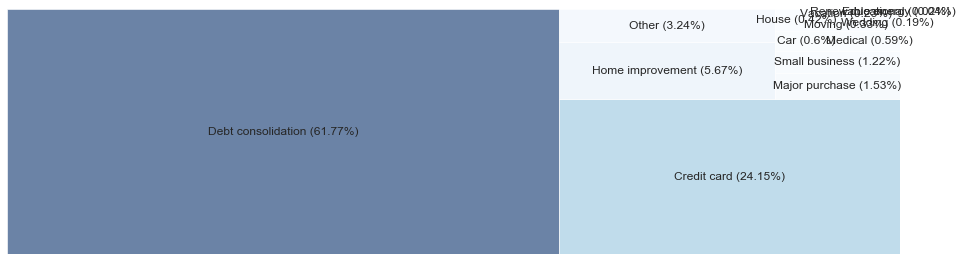

In [19]:
norm = matplotlib.colors.Normalize(vmin=min(portfolio["loan_amnt"]), vmax=max(portfolio["loan_amnt"]))
colors = [matplotlib.cm.Blues(norm(value)) for value in portfolio["loan_amnt"]]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 4.5)

fig = plt.gcf()
fig.set_size_inches(16, 4.5)

squarify.plot(label=portfolio["label"],sizes=portfolio["loan_amnt"], color = colors, alpha=.6)
#plt.title("Man City Assists",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

#### Boxplot of Loan Purpose and Loan Amount

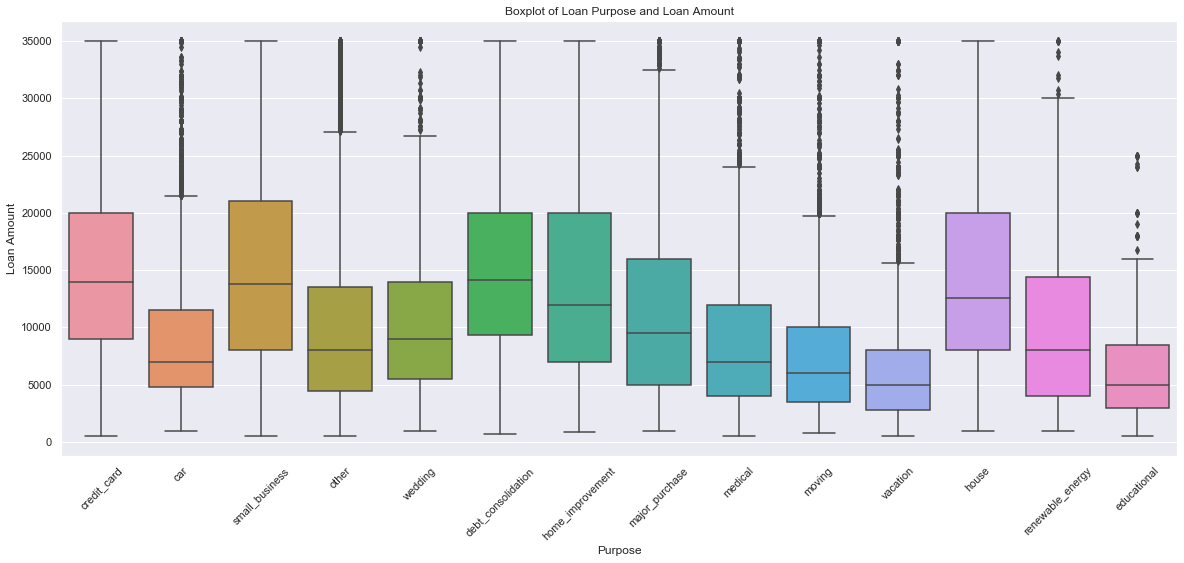

In [12]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x='purpose', y='loan_amnt', data=df)
ax.set_title('Boxplot of Loan Purpose and Loan Amount')
ax.set(xlabel='Purpose', ylabel='Loan Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

The five loan categories with the highest means are credit card, small business, debt consolidation, home improvement, and house loans.

#### Ridge Plot of Installment by Loan Status

In [44]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [68]:
# Subset df.
df_sub = df[df['loan_status'].isin(['Fully Paid', 'Charged Off', 'Late (31-120 days)'])].reset_index(drop = True)

<Figure size 1440x720 with 0 Axes>

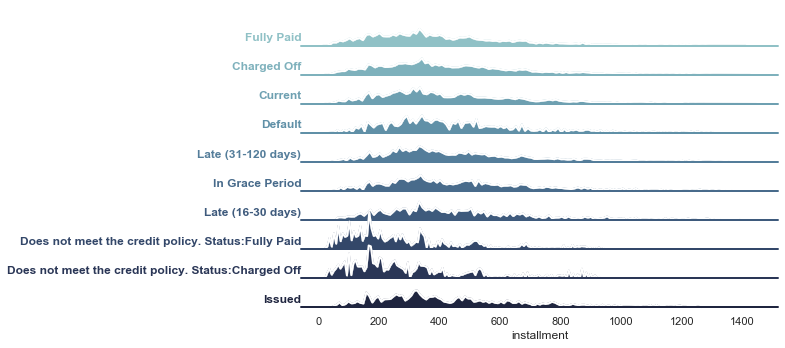

In [82]:
plt.figure(figsize=(20,10)) 

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
#g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)
g = sns.FacetGrid(df, row="loan_status", hue="loan_status", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "installment", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "installment", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "installment")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

### NLP for Loan Description (desc)

In [8]:
df['desc'][3]

"  Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>"